In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import lxml,html

import sklearn


### Phase 1- Reading data and cleaning

In [2]:
import glob
path ='C:\\Users\\srihari\\Desktop\\content\\aclImdb\\train\\neg'   # path for training negative folder
allfiles = glob.glob(path + "\*.txt")

mylist = []

for myfile in allfiles:
    df = pd.read_csv(myfile,error_bad_lines=False,low_memory=True,quoting=0,header=None,skip_blank_lines=True,sep='\r\t',encoding='Latin-1')
    mylist.append(df)
    

df_neg = pd.concat(mylist, axis = 0,ignore_index=True)
df_neg.columns=['review']
df_neg['label']='negative'
df_neg.head()




C:\Users\Aakash\Miniconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,review,label
0,Story of a man who has unnatural feelings for ...,negative
1,Airport '77 starts as a brand new luxury 747 p...,negative
2,This film lacked something I couldn't put my f...,negative
3,"Sorry everyone,,, I know this is supposed to b...",negative
4,When I was little my parents took me along to ...,negative


In [3]:
import glob
path ='C:\\Users\\srihari\\Desktop\\content\\aclImdb\\train\\pos'   # train positive folder path
allfiles = glob.glob(path + "\*.txt")

mylist = []

for myfile in allfiles:
    #print(myfile)
    df = pd.read_csv(myfile,error_bad_lines=False,low_memory=True,quoting=0,header=None,skip_blank_lines=True,sep='\r\t',encoding='Latin-1')
    mylist.append(df)
    
df_pos = pd.concat(mylist, axis = 0,ignore_index=True)
df_pos.columns=['review']
df_pos['label']='positive'
df_pos.head()


C:\Users\Aakash\Miniconda3\lib\site-packages\ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,review,label
0,Bromwell High is a cartoon comedy. It ran at t...,positive
1,Homelessness (or Houselessness as George Carli...,positive
2,Brilliant over-acting by Lesley Ann Warren. Be...,positive
3,This is easily the most underrated film inn th...,positive
4,This is not the typical Mel Brooks film. It wa...,positive


In [4]:
train_df=pd.concat([df_neg,df_pos])

# Removing html tags using beautifulsoup library

from bs4 import BeautifulSoup
train_df['review'] = [BeautifulSoup(text).get_text() for text in train_df['review']]

train_df.tail()    # train_df after concatenating negative and positive reviews dataframe

,review,label
12495,"Seeing as the vote average was pretty low, and...",positive
12496,"The plot had some wretched, unbelievable twist...",positive
12497,I am amazed at how this movie(and most others ...,positive
12498,A Christmas Together actually came before my t...,positive
12499,Working-class romantic drama from director Mar...,positive


In [5]:
import glob
path1 ='C:\\Users\\srihari\\Desktop\\content\\aclImdb\\test\\neg' 
path2 ='C:\\Users\\srihari\\Desktop\\content\\aclImdb\\test\\pos' # use your path
allfilesneg = glob.glob(path1 + "\*.txt")
allfilespos = glob.glob(path2 + "\*.txt")
mylistneg = []
mylistpos = []
for myfilepos in allfilespos:
 
    dfpos = pd.read_csv(myfilepos,error_bad_lines=False,low_memory=True,quoting=0,header=None,skip_blank_lines=True,sep='\r\t',encoding='Latin-1')
    mylistpos.append(dfpos)

for myfileneg in allfilesneg:
 
    dfneg = pd.read_csv(myfileneg,error_bad_lines=False,low_memory=True,quoting=0,header=None,skip_blank_lines=True,sep='\r\t',encoding='Latin-1')

    mylistneg.append(dfneg)


    
    
df_pos = pd.concat(mylistpos, axis = 0,ignore_index=True)
df_pos.columns=['review']
df_pos['label']='positive'




df_neg = pd.concat(mylistneg, axis = 0,ignore_index=True)
df_neg.columns=['review']
df_neg['label']='negative'

test_df=pd.concat([df_neg,df_pos])


test_df['review'] = [BeautifulSoup(text).get_text() for text in test_df['review']]


test_df.head() # test_df after concatenating test negative and positive reviews dataframe

C:\Users\Aakash\Miniconda3\lib\site-packages\ipykernel_launcher.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Aakash\Miniconda3\lib\site-packages\ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


,review,label
0,Once again Mr. Costner has dragged out a movie...,negative
1,This is an example of why the majority of acti...,negative
2,"First of all I hate those moronic rappers, who...",negative
3,Not even the Beatles could write songs everyon...,negative
4,Brass pictures (movies is not a fitting word f...,negative


In [6]:
# Data Cleaning
# converting to lower case and removing everything other than alphabets
train_df['review'] = train_df['review'].str.lower().str.replace('[^a-z]', ' ').str.split()
train_df.head()

,review,label
0,"[story, of, a, man, who, has, unnatural, feeli...",negative
1,"[airport, starts, as, a, brand, new, luxury, p...",negative
2,"[this, film, lacked, something, i, couldn, t, ...",negative
3,"[sorry, everyone, i, know, this, is, supposed,...",negative
4,"[when, i, was, little, my, parents, took, me, ...",negative


In [7]:

test_df['review'] = test_df['review'].str.lower().str.replace('[^a-z]', ' ').str.split()
test_df.head()

,review,label
0,"[once, again, mr, costner, has, dragged, out, ...",negative
1,"[this, is, an, example, of, why, the, majority...",negative
2,"[first, of, all, i, hate, those, moronic, rapp...",negative
3,"[not, even, the, beatles, could, write, songs,...",negative
4,"[brass, pictures, movies, is, not, a, fitting,...",negative


In [8]:
# stop word removal
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

StopWords = stopwords.words("english")

train_df['review'] = train_df['review'].apply(lambda x: [word for word in x if word not in StopWords])
train_df.head()

test_df['review'] = test_df['review'].apply(lambda x: [word for word in x if word not in StopWords])
test_df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aakash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,label
0,"[mr, costner, dragged, far, longer, necessary,...",negative
1,"[example, majority, action, films, generic, bo...",negative
2,"[first, hate, moronic, rappers, could, nt, act...",negative
3,"[even, beatles, could, write, songs, everyone,...",negative
4,"[brass, pictures, movies, fitting, word, somew...",negative


In [11]:
# port stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
train=train_df.copy()

train['review'] = train['review'].apply(lambda x: ' '.join([ps.stem(word) for word in x])) 
train.head()

,review,label
0,unnatur feel pig start open scene terrif examp...,negative
1,airport start brand new luxuri plane load valu...,negative
2,lack someth put finger first charisma part lea...,negative
3,sorri everyon know suppos art wow hand gun scr...,negative
4,littl parent took along theater interior mani ...,negative


In [12]:
ps = PorterStemmer()
test=test_df.copy()

test['review'] = test['review'].apply(lambda x: ' '.join([ps.stem(word) for word in x])) 
test.head()

,review,label
0,mr costner drag far longer necessari asid terr...,negative
1,exampl major action film gener bore noth worth...,negative
2,first hate moron rapper could nt act gun press...,negative
3,even beatl could write song everyon like altho...,negative
4,brass pictur movi fit word somewhat brassi all...,negative


In [13]:
df=pd.concat([train,test],ignore_index=True)
df.tail()  

,review,label
49995,extraordinarili impress best sport film everi ...,positive
49996,although golf fan attend sneak preview absolut...,positive
49997,edg love viewer transport strike world ww lond...,positive
49998,complex subtleti make thought provok short fil...,positive
49999,seen kid boy troubl past join militari face pa...,positive


### Phase 2 - Exploration

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
tempcv=df.copy()


cv = CountVectorizer(min_df=0.05,max_df=0.98) # min_df removes review specific words and max_df removes corpus specific words
vec=cv.fit_transform(tempcv.review[tempcv.label=='positive'])
cv.vocabulary_
c=cv.vocabulary_
pos_word=[]
for key in c:
    pos_word.append(key)
print('Most common words associated with positive reviews')
pos_word

Most common words associated with positive reviews


['high',
 'comedi',
 'time',
 'life',
 'year',
 'lead',
 'believ',
 'right',
 'whole',
 'episod',
 'tri',
 'classic',
 'line',
 'expect',
 'mani',
 'age',
 'think',
 'far',
 'never',
 'help',
 'consid',
 'human',
 'everyth',
 'go',
 'work',
 'matter',
 'lost',
 'thing',
 'war',
 'kid',
 'next',
 'end',
 'given',
 'live',
 'without',
 'home',
 'entertain',
 'set',
 'pictur',
 'like',
 'direct',
 'star',
 'play',
 'world',
 'decid',
 'day',
 'want',
 'make',
 'everi',
 'move',
 'written',
 'meet',
 'charact',
 'includ',
 'woman',
 'name',
 'got',
 'use',
 'fight',
 'kill',
 'love',
 'plot',
 'found',
 'film',
 'show',
 'side',
 'young',
 'someth',
 'hand',
 'know',
 'mayb',
 'give',
 'instead',
 'other',
 'brilliant',
 'act',
 'best',
 'ever',
 'seen',
 'scene',
 'second',
 'face',
 'good',
 'anyth',
 'take',
 'say',
 'three',
 'funni',
 'word',
 'favorit',
 'later',
 'usual',
 'two',
 'big',
 'get',
 'better',
 'quit',
 'often',
 'sure',
 'view',
 'fall',
 'still',
 'way',
 'truli',
 'i

In [16]:
cv = CountVectorizer(max_df=0.98,ngram_range=(1,2)) 
vec=cv.fit_transform(tempcv.review[tempcv.label=='negative'])
cv.vocabulary_
c=cv.vocabulary_
neg_word=[]
for key in c:
    neg_word.append(key)

print('Most common words associated with negative reviews')
sorted(neg_word[:100])

Most common words associated with negative reviews
Note: ngram_range makes much more sense as it takes phrases into account as well like absurd comedy, third grader which differentiates it from positive review word comedy,grade


['absurd',
 'absurd comedi',
 'absurd whole',
 'audienc',
 'audienc turn',
 'better',
 'better might',
 'briefli',
 'chant',
 'chant singer',
 'cinematographi',
 'comedi',
 'comedi formal',
 'crazi',
 'crazi chant',
 'cryptic',
 'cryptic dialogu',
 'dialogu',
 'dialogu shakespear',
 'easi',
 'easi third',
 'era',
 'era turn',
 'even',
 'even era',
 'eventu',
 'eventu make',
 'exampl',
 'exampl absurd',
 'feel',
 'feel pig',
 'formal',
 'formal orchestra',
 'forrest',
 'freder',
 'futur',
 'gener',
 'gener narr',
 'good',
 'good cinematographi',
 'grader',
 'grader technic',
 'great',
 'insan',
 'insan violent',
 'kirkland',
 'level',
 'level better',
 'make',
 'make put',
 'might',
 'might think',
 'mob',
 'mob crazi',
 'narr',
 'narr eventu',
 'open',
 'open scene',
 'orchestra',
 'orchestra audienc',
 'pig',
 'pig start',
 'put',
 'put even',
 'salli',
 'scene',
 'scene terrif',
 'seen',
 'shakespear',
 'shakespear easi',
 'singer',
 'singer unfortun',
 'star',
 'start',
 'start open

In [17]:
# Word frequency in positive  category

cvp = CountVectorizer(min_df=0.01)  # min_df removes review specific words and max_df removes corpus specific words
vecp=cvp.fit_transform(tempcv.review[tempcv.label=='positive'])

freqs = zip(cvp.get_feature_names(),vecp.toarray().sum(axis=0))    
# sort from largest to smallest
print('High frequency positive words with their frequency in corpus->')
print(sorted(freqs, key=lambda x: x[1],reverse=True)[:20])

freqs = zip(cvp.get_feature_names(),vecp.toarray().sum(axis=0))    
# sort from largest to smallest
print('\nLow frequency positive words with their frequency in corpus->')
print(sorted(freqs, key=lambda x: x[1],reverse=False)[:20])

High frequency positive words with their frequency in corpus->
[('like', 20556), ('time', 16624), ('good', 15257), ('great', 13124), ('well', 13072), ('watch', 12904), ('love', 12465), ('show', 11079), ('play', 10065), ('scene', 10055), ('even', 9918), ('end', 9284), ('first', 9233), ('way', 8861), ('film', 8783), ('best', 8521), ('think', 8486), ('go', 8340), ('life', 8147), ('year', 7819)]

Low frequency positive words with their frequency in corpus->
[('poignant', 253), ('unforgett', 258), ('sheer', 260), ('unbeliev', 261), ('emerg', 264), ('reward', 264), ('accompani', 265), ('reminisc', 265), ('accord', 266), ('tremend', 266), ('crack', 267), ('fabul', 267), ('anywher', 268), ('grown', 268), ('regret', 268), ('belief', 269), ('luck', 269), ('cheer', 270), ('consider', 270), ('constant', 270)]


In [18]:
# Word frequency in negative category
tempcv=df.copy()

cvn = CountVectorizer(min_df=0.05)
vecn=cvn.fit_transform(tempcv.review[tempcv.label=='negative'])
print('Most common words associated with negative reviews')


freqs = zip(cvn.get_feature_names(),vecn.toarray().sum(axis=0))    
# sort from largest to smallest
print('High frequency negative words with their frequency in corpus->')

print(sorted(freqs, key=lambda x: x[1],reverse=True)[:20])

freqs = zip(cvn.get_feature_names(),vecn.toarray().sum(axis=0))    
print('\nLow frequency negative words with their frequency in corpus->')
print(sorted(freqs, key=lambda x: x[1],reverse=False)[:20])

Most common words associated with negative reviews
High frequency negative words with their frequency in corpus->
[('like', 24637), ('even', 15427), ('time', 15329), ('watch', 14969), ('good', 14921), ('bad', 14777), ('scene', 11379), ('act', 10575), ('go', 9913), ('end', 9807), ('could', 9299), ('think', 9056), ('show', 8834), ('made', 8801), ('well', 8712), ('plot', 8661), ('way', 8371), ('first', 8347), ('say', 8329), ('movi', 8311)]

Low frequency negative words with their frequency in corpus->
[('matter', 1422), ('lost', 1423), ('anyway', 1426), ('cheap', 1443), ('truli', 1443), ('credit', 1452), ('pleas', 1455), ('style', 1462), ('manag', 1463), ('extrem', 1473), ('alreadi', 1474), ('obvious', 1478), ('avoid', 1479), ('edit', 1482), ('predict', 1498), ('classic', 1499), ('ok', 1506), ('base', 1512), ('hate', 1516), ('wait', 1517)]


### Phase 3 Visualization

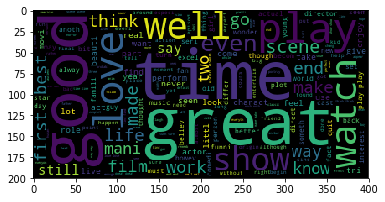

In [32]:
# wordcloud for positive review words 
temptf=df.copy()

from sklearn.feature_extraction.text import TfidfVectorizer
tfvectorizerp = TfidfVectorizer(sublinear_tf=True,use_idf=True,ngram_range=(1,2))
tvp=tfvectorizerp.fit_transform(temptf.review[temptf['label']=='positive'])
tfvectorizerp.vocabulary_

t=tfvectorizerp.vocabulary_
pos_words=[]
for key in t:
    pos_words.append(key)

pos = " ".join(pos_words)
pos[:1000]
from wordcloud import WordCloud

pos_wordcloud = WordCloud().generate(pos)

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(pos_wordcloud)
plt.show()

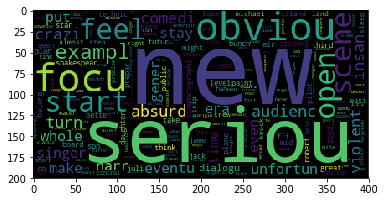

In [80]:
# wordcloud for negative review words before feature selction
temptf=df.copy()
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

tfvectorizern = TfidfVectorizer()
tvn=tfvectorizern.fit_transform(temptf.review[temptf['label']=='negative'])
tfvectorizern.vocabulary_

t=tfvectorizern.vocabulary_
negative_words=[]
for key in t:
    negative_words.append(key)

neg = " ".join(negative_words)
neg[:1000]

from wordcloud import WordCloud
neg_wordcloud = WordCloud().generate(neg)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(neg_wordcloud)
plt.show()
## before feature selction, negative reviews words are absurd,bad,unfortune(lower right),violent(lower right). After feature selection I am getting good words for it.

### Phase 5-Model Building

#### Supervised Learning: Build a sentiment analysis model to predict positive and negative classes

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
cv=TfidfVectorizer(max_features=5000)  # selecting top 5000 featrues only because of low RAM
le=LabelEncoder()

Xtrain_df=cv.fit_transform(train['review'])

Ytrain_df=le.fit_transform(train['label'])
Xtest_df=cv.fit_transform(test['review'])
Ytest_df=le.fit_transform(test['label'])

In [37]:
###### Logistic regression model for predicting positive and negative classes #####

from sklearn.model_selection import train_test_split 

### train test split for training data only ie 20 percent of training data is kept for testing(validation)
X_train, X_test, y_train, y_test = train_test_split(Xtrain_df, Ytrain_df, test_size = 0.2, random_state = 40)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train,y_train)   # fit using train data
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy,cm  # accuracy in prediction of training data only

(0.8854, array([[2172,  327],
        [ 246, 2255]], dtype=int64))

In [39]:

from sklearn.metrics import f1_score
actual=Ytest_df
from sklearn import metrics

# Generate the roc curve using scikits-learn.
fpr, tpr, thresholds = metrics.roc_curve(actual, y_pred, pos_label=1)

# Measure the area under the curve.  The closer to 1, the "better" the predictions.
print("AUC of the test data predictions: {0}".format(metrics.auc(fpr, tpr))) # the area under the ROC curve. This will tell us how "good" the model is -- closer to 1 means that the model is better.

f1=f1_score(Ytest_df, y_pred) 
print('f1 score for test data prediction-',f1) 

AUC of the test data predictions: 0.63216
f1 score for test data prediction- 0.6276320051830256


#### Unsupervised Learning: Build a clustering model consisting of 2 clusters based on positive and negative reviews

In [86]:
##### fitting the df data using kmeans

temptrain=df.copy()  # df is the final dataframe formed by concatenating train and test in phase 1
temptrain.drop(columns='label',axis=1,inplace=True)

from sklearn.cluster import KMeans

from sklearn.feature_extraction.text import TfidfVectorizer
hv = TfidfVectorizer(max_df=0.99,max_features=5000)  
X=hv.fit_transform(temptrain.review)


num = 2
kmeans = KMeans(n_clusters=num, init='k-means++', max_iter=100, n_init=1)
k=kmeans.fit(X)    ## fitting the training data


print("Top terms per cluster in df dataframe:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = hv.get_feature_names()

for i in range(num):
    print("Cluster %d:" % i),     # cluster 0 for positive
    for ind in order_centroids[i, 50:60]:   # # slicing to get good words for each cluster
        print(' %s' % terms[ind]),


Top terms per cluster in df dataframe:
Cluster 0:
 want
 world
 famili
 part
 young
 say
 star
 plot
 director
 comedi
Cluster 1:
 stupid
 terribl
 littl
 effect
 script
 part
 mani
 aw
 seem
 take


################################## END ########################################